In [1]:
pwd

'D:\\SkillsSquad\\Courses\\Machine Learning Foundation\\Classification'

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('titanic.csv')

In [17]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [18]:
df.keys()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [19]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [20]:
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1
890,891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [23]:
df.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


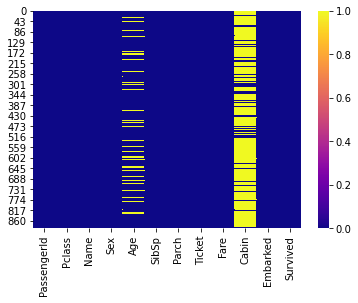

In [24]:
sns.heatmap(df.isnull(), cmap='plasma')

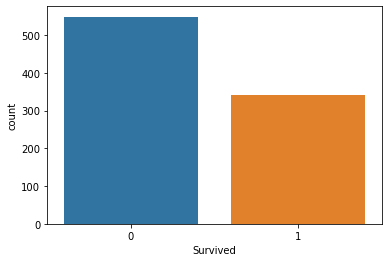

In [25]:
sns.countplot(x='Survived', data=df)

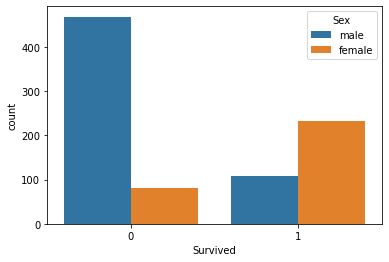

In [26]:
sns.countplot(x='Survived', hue = 'Sex', data=df)

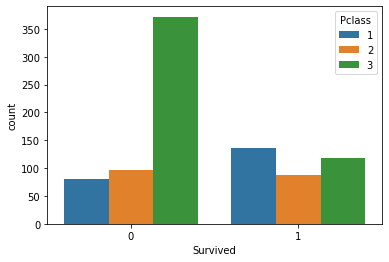

In [27]:
sns.countplot(x='Survived', hue = 'Pclass', data=df)

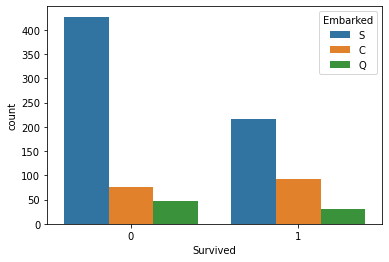

In [28]:
sns.countplot(x='Survived', hue = 'Embarked', data=df)     

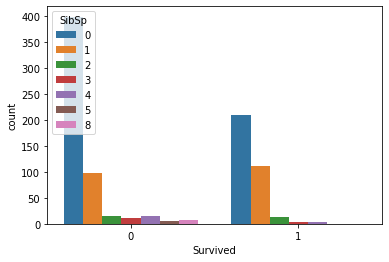

In [29]:
sns.countplot(x='Survived', hue = 'SibSp', data=df)     

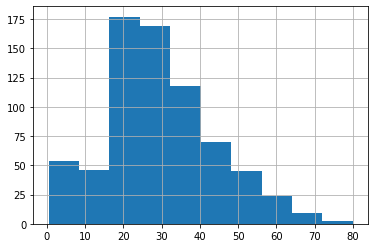

In [30]:
df['Age'].hist()

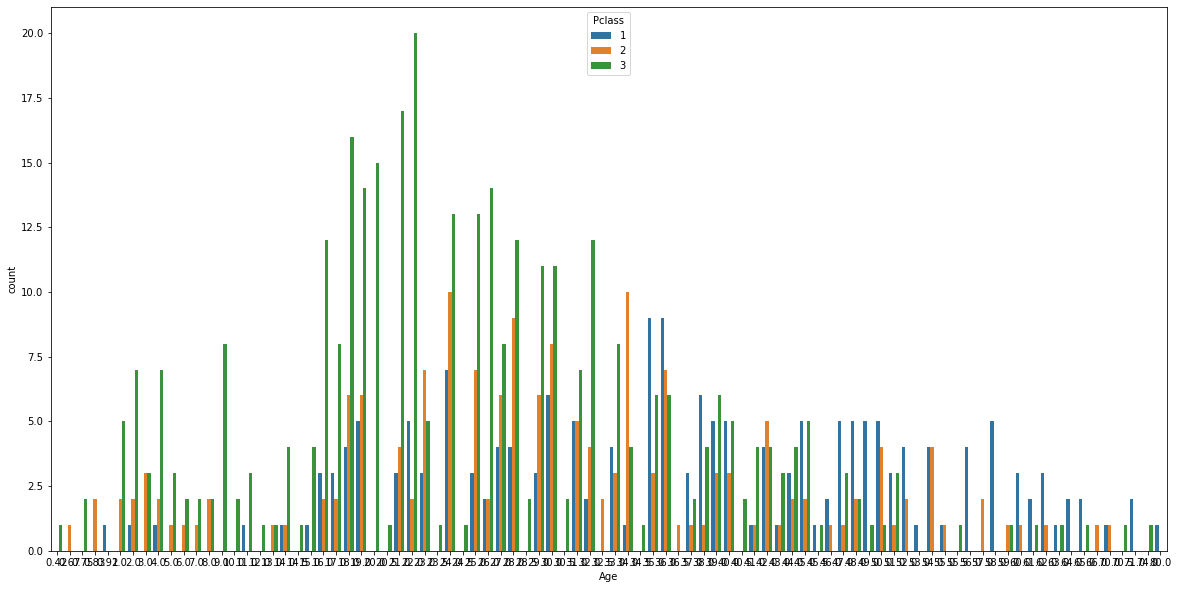

In [66]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age', hue = 'Pclass', data=df)     

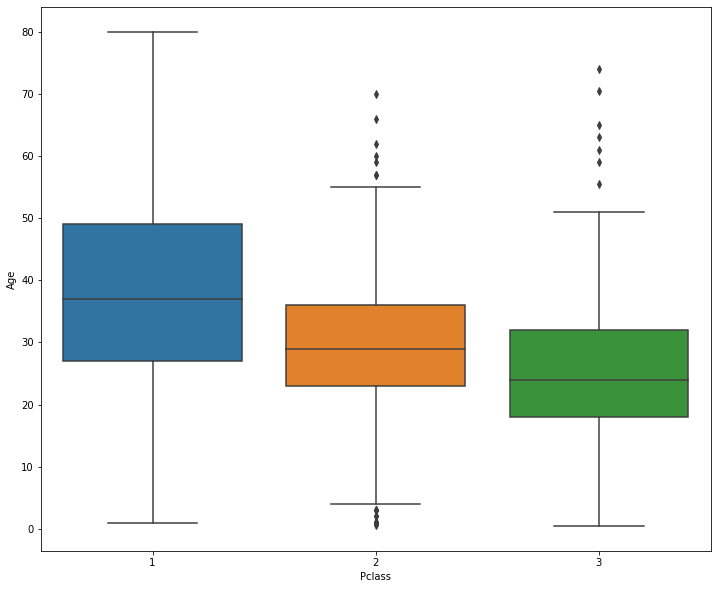

In [31]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Pclass', y = 'Age', data=df)     

In [32]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
            

In [33]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis = 1)

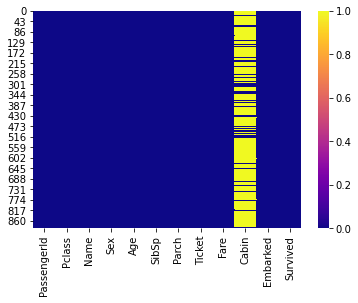

In [34]:
sns.heatmap(df.isnull(), cmap='plasma')

In [35]:
df.drop('Cabin', axis = 1, inplace = True)

In [36]:
df.keys()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')

In [37]:
df.dropna(inplace = True)

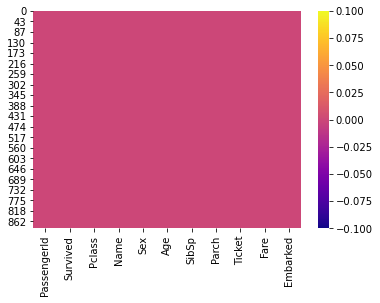

In [74]:
sns.heatmap(df.isnull(), cmap='plasma')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Pclass       889 non-null    int64  
 2   Name         889 non-null    object 
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
 10  Survived     889 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [39]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    object 
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
 7   Survived  889 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [41]:
gender = pd.get_dummies(df['Sex'], drop_first=True)

In [83]:
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [42]:
Emb = pd.get_dummies(df['Embarked'], drop_first=True)

In [85]:
Emb

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [80]:
#df.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    object 
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
 7   Survived  889 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [44]:
df.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Age       889 non-null    float64
 2   SibSp     889 non-null    int64  
 3   Parch     889 non-null    int64  
 4   Fare      889 non-null    float64
 5   Survived  889 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 48.6 KB


In [46]:
df = pd.concat([df,gender, Emb], axis = 1)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Age       889 non-null    float64
 2   SibSp     889 non-null    int64  
 3   Parch     889 non-null    int64  
 4   Fare      889 non-null    float64
 5   Survived  889 non-null    int64  
 6   male      889 non-null    uint8  
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


In [48]:
df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
0,3,22.0,1,0,7.2500,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,1


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = df.drop('Survived', axis = 1)
y = df['Survived']

In [51]:
print(X)

     Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         3  22.0      1      0   7.2500     1  0  1
1         1  38.0      1      0  71.2833     0  0  0
2         3  26.0      0      0   7.9250     0  0  1
3         1  35.0      1      0  53.1000     0  0  1
4         3  35.0      0      0   8.0500     1  0  1
..      ...   ...    ...    ...      ...   ... .. ..
886       2  27.0      0      0  13.0000     1  0  1
887       1  19.0      0      0  30.0000     0  0  1
888       3  24.0      1      2  23.4500     0  0  1
889       1  26.0      0      0  30.0000     1  0  0
890       3  32.0      0      0   7.7500     1  1  0

[889 rows x 8 columns]


In [52]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 121 to 37
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  711 non-null    int64  
 1   Age     711 non-null    float64
 2   SibSp   711 non-null    int64  
 3   Parch   711 non-null    int64  
 4   Fare    711 non-null    float64
 5   male    711 non-null    uint8  
 6   Q       711 non-null    uint8  
 7   S       711 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 35.4 KB


In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
reg = LogisticRegression()

In [57]:
reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_pred = reg.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [60]:
cm = confusion_matrix(y_test, y_pred)

In [61]:
print(cm)

[[91 14]
 [13 60]]


In [62]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 387 to 234
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  178 non-null    int64  
 1   Age     178 non-null    float64
 2   SibSp   178 non-null    int64  
 3   Parch   178 non-null    int64  
 4   Fare    178 non-null    float64
 5   male    178 non-null    uint8  
 6   Q       178 non-null    uint8  
 7   S       178 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 8.9 KB


In [63]:
accuracy_score(y_test, y_pred)

0.848314606741573